In [103]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# 1. Gather PNG filenames from MPT/resource folder
def gather_png_filenames(root_folder):
    png_files = []
    for root, dirs, files in os.walk(root_folder):
        if os.path.relpath(root, root_folder).count(os.sep) < 2:  # Restrict to two subdirectories
            # print(root)
            for file in files:
                if file.endswith(".png"):
                    png_files.append(os.path.join(root, file))
    return png_files

resource_folder = r'MPT\\resource'

png_files = gather_png_filenames(resource_folder)
print( len(png_files), png_files[0] )

# 2. Load source images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append((path, img))
        else:
            print(f'error : {path}')
    return images

source_images = load_images(png_files)
print(len(source_images), len(source_images[0]), np.array(source_images[3][1]).shape)

74 MPT\\resource\01_block\PuzzleBlue.png
74 2 (86, 86, 4)


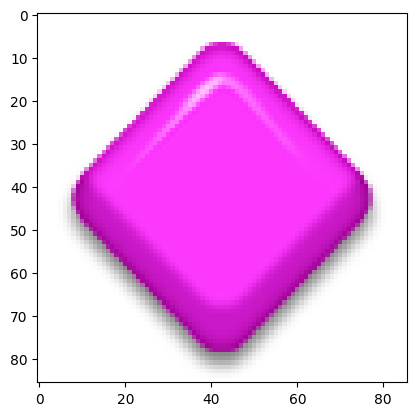

In [105]:
plt.imshow(np.array(source_images[2][1]))

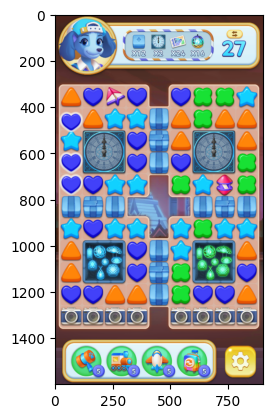

In [116]:
# 3. Load puzzle image
def load_puzzle_image(puzzle_path):
    puzzle_img = cv2.imread(puzzle_path)
    return puzzle_img

game_screen_names=['lv12', 'lv16_ing', 'lv16_ing3', 'lv49_all_items', 'lv50', 'lv171']
game_screen_images = {}
for i in range(len(game_screen_names)):
    game_screen_images[game_screen_names[i]] = load_puzzle_image(rf'MPT\\{game_screen_names[i]}.png')

for k,v in game_screen_images.items():
    plt.imshow(v)

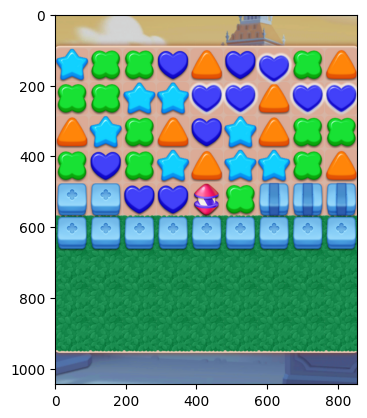

In [107]:
width, height = lv12.shape[1], lv12.shape[0]
cell_width = 95
cell_height = 95

def cut_board(game_screen, width=900, height=1600, cell_width=95, cell_height=95):
    return game_screen[310:310+cell_height*11,(width - cell_width*9)//2:(width - cell_width*9)//2+cell_width*9, :]
board={}
board['lv12'] = cut_board(lv12)
plt.imshow(board['lv12'])

In [11]:
cells = np.array([[board[i:i+cell_height, j:j+cell_width, :] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells.shape

(9, 11, 95, 95, 4)

In [12]:
(cells[5][2] - cells[6][1]).mean(), (cells[0][3] - cells[4][1]).mean()

(np.float64(69.83074792243767), np.float64(1.9149584487534625))

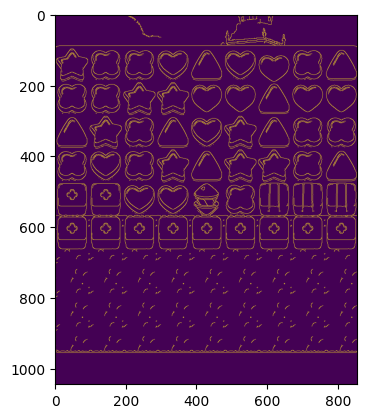

In [13]:
board_canny = cv2.Canny(board, 100, 200)
plt.imshow(board_canny)

In [14]:
cells_canny = np.array([[board_canny[i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells_canny.shape

(9, 11, 95, 95)

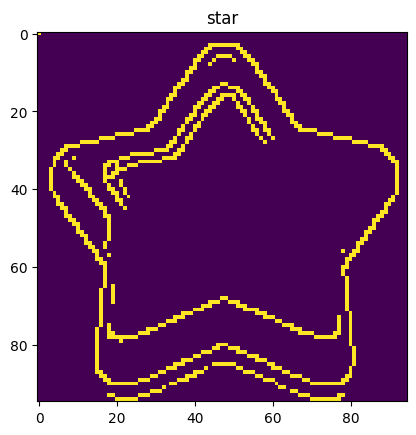

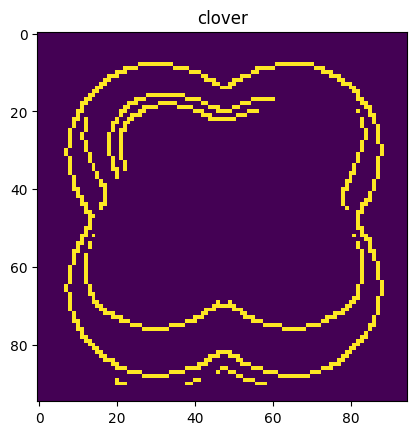

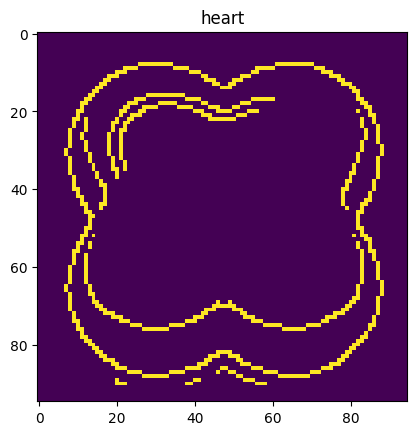

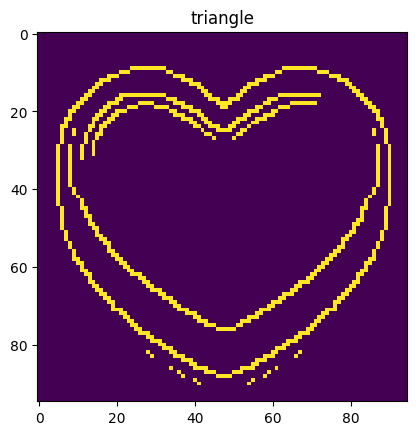

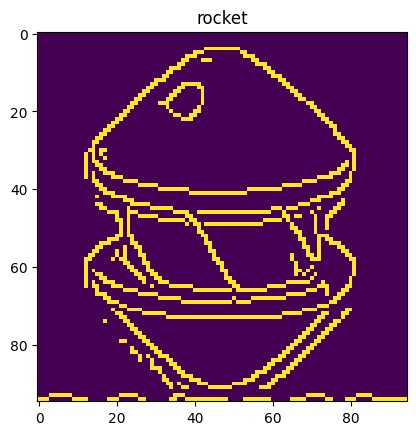

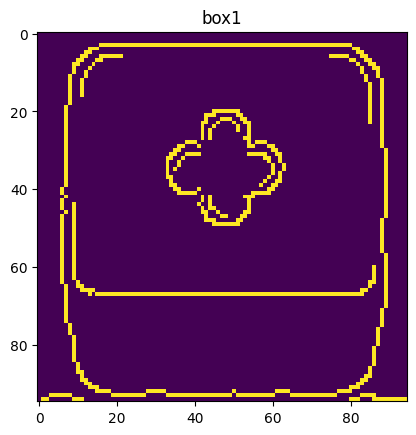

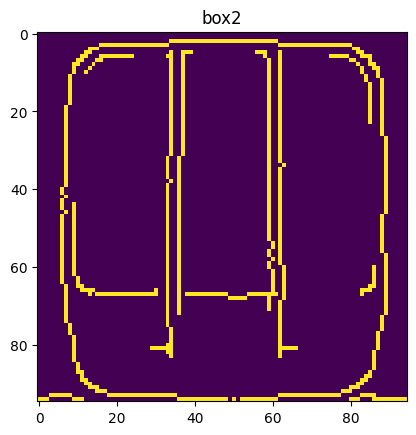

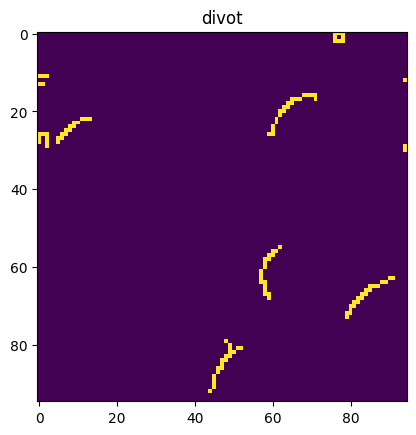

In [15]:
templates = {}
templates['star'] = cells_canny[0][1]
templates['clover'] = cells_canny[1][1]
templates['heart'] = cells_canny[2][1]
templates['triangle'] = cells_canny[3][1]
templates['rocket'] = cells_canny[4][5]
templates['box1'] = cells_canny[0][5]
templates['box2'] = cells_canny[7][5]
templates['divot'] = cells_canny[1][8]

for k, v in templates.items():
    plt.imshow(v)
    plt.title(k)
    plt.show()

NUmber of match result : 15/15


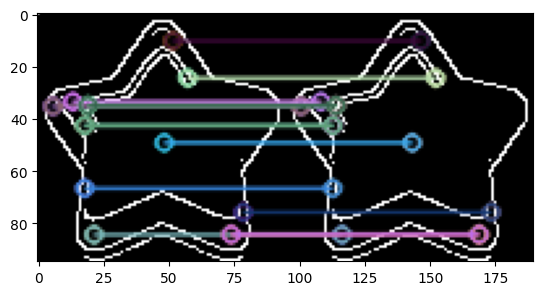

In [16]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[0][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[2][2], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[0][1], keypoints1, cells_canny[2][2], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

NUmber of match result : 7/15


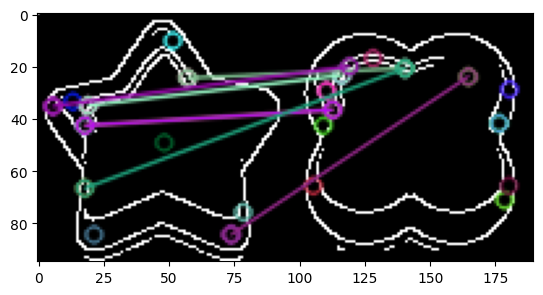

In [55]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[0][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[0][2], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[0][1], keypoints1, cells_canny[0][2], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

NUmber of match result : 8/17


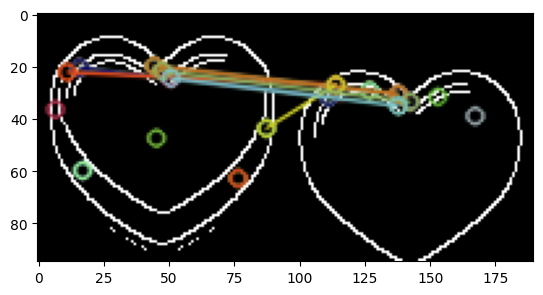

In [20]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[5][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[6][1], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[5][1], keypoints1, cells_canny[6][1], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

In [65]:
board_gray = cv2.cvtColor(board, cv2.COLOR_BGR2GRAY)
cells_gray = np.array([[board_gray[i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells_gray.shape

(9, 11, 95, 95)

In [95]:
keypoints1[0]

< cv2.KeyPoint 0000025337526460>

NUmber of match result : 8/26
NUmber of match result : 8/29


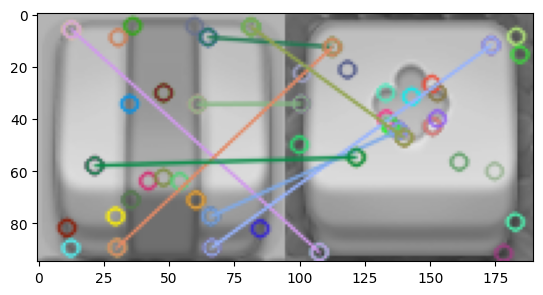

In [91]:
sift = cv2.SIFT_create()
img_1 = cells_gray[7][5]
img_2 = cells_gray[7][6]
keypoints1, descriptors1 = sift.detectAndCompute(img_1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img_2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(img_1, keypoints1, img_2, keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")
print(f"NUmber of match result : {len(matches)}/{len(descriptors2)}")

plt.imshow(result_image)

In [69]:
len(descriptors1)

TypeError: object of type 'NoneType' has no len()

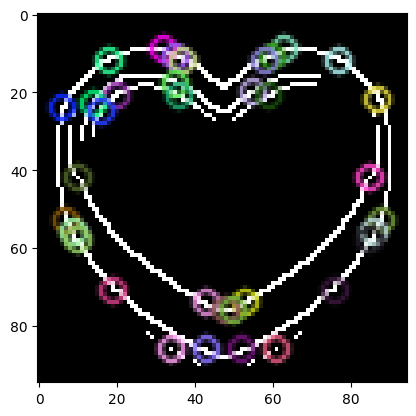

In [18]:
# FASt 특징 검출기 생성
fast = cv2.FastFeatureDetector_create(50)
# 특징점 검출
keypoints = fast.detect(cells_canny[5][1], None)
# 특징점 그리기
img = cv2.drawKeypoints(cells_canny[5][1], keypoints, None)
# 결과 출력
plt.imshow(img)

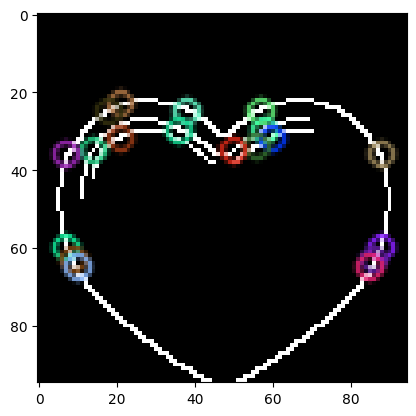

In [19]:
# FASt 특징 검출기 생성
fast = cv2.FastFeatureDetector_create(50)
# 특징점 검출
keypoints = fast.detect(cells_canny[6][1], None)
# 특징점 그리기
img = cv2.drawKeypoints(cells_canny[6][1], keypoints, None)
# 결과 출력
plt.imshow(img)

NUmber of match result : 8/17


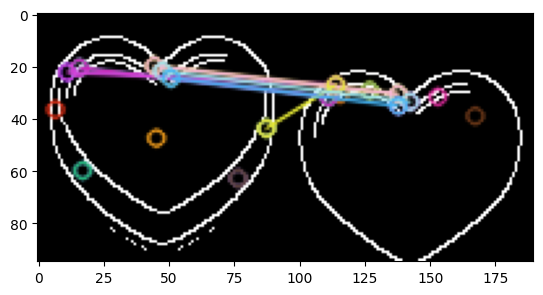

In [52]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[5][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[6][1], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[5][1], keypoints1, cells_canny[6][1], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

In [49]:
len(matches)

0

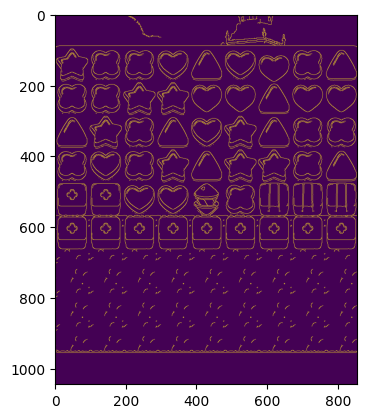

In [45]:
board_binary = (board_canny > 0).astype(bool)
plt.imshow(board_binary)

In [48]:
cells_binary = np.array([[board_binary[i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells_binary.shape

(9, 11, 95, 95)

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
(cells_binary[0][1] == cells_binary[2][2]).sum() / (cells_binary[5][1].sum() + cells_binary[6][5].sum())

np.float64(6.206327372764787)

In [50]:
(cells_binary[0][1] == cells_binary[0][2]).sum() / (cells_binary[5][1].sum() + cells_binary[6][5].sum())

np.float64(5.37414030261348)

In [28]:
cells[5][1].shape

(95, 95, 4)

In [41]:
np.median(cells[5][1],axis=(0,1))

array([ 66.,  65., 195., 255.])

In [46]:
np.median(cells[5][2],axis=(0,1))

array([104., 102., 217., 255.])

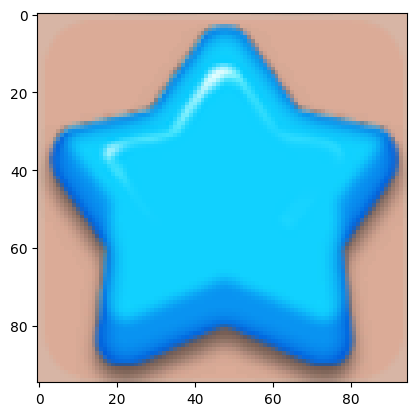

In [44]:
plt.imshow(cells[1][3])

In [22]:
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)
keypoints1, descriptors1 = surf.detectAndCompute(cells_canny[0][1], None)
keypoints2, descriptors2 = surf.detectAndCompute(cells_canny[2][2], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[0][1], keypoints1, cells_canny[2][2], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

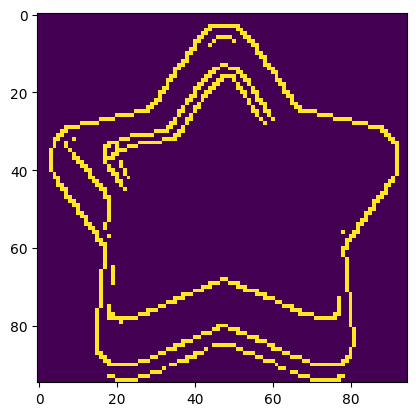

In [71]:
cv2.matchTemplate(cells_canny[0][1], cells_canny[0][1], cv2.TM_CCOEFF_NORMED)

In [60]:
edges.shape

(95, 95)

In [66]:
import pandas as pd
((edges == 0) + (edges == 255)).sum()

np.int64(9025)

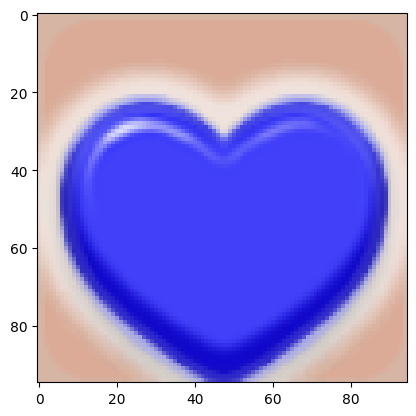

In [46]:
plt.imshow(cells[6][1])

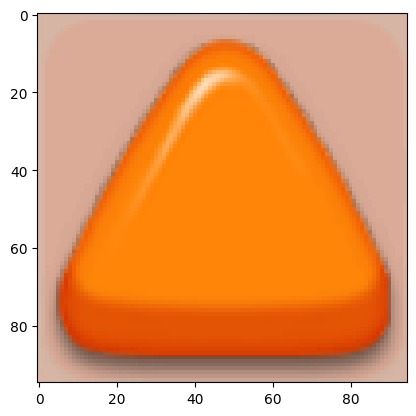

In [33]:
plt.imshow(cells[0][3])

In [ ]:
cell_from_images = []
